## Deliverables

- Import your data into a Pandas DataFrame.
- Merge your DataFrames.
- Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
- Determine the mean, median, and mode for the following:
  - The total number of rides for each city type.
  - The average fares for each city type.
  - The total number of drivers for each city type.
- Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
  - The number of rides for each city type.
  - The fares for each city type.
  - The number of drivers for each city type.
- Create a pie chart that visualizes each of the following data for each city type:
  - The percent of total fares.
  - The percent of total rides.
  - The percent of total drivers.

In [1]:
# Add Matplotlib inline magic command

%matplotlib inline

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [11]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create the Urban City Dataframe

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Suburban and Rural cities dataframes

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [17]:
# Get the number of rides for urban cities.

urban_ride_count = urban_cities_df.groupby("city").count()
urban_ride_count = urban_ride_count["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# Create the suburban and rural ride count.

suburban_ride_count = suburban_cities_df.groupby('city').count()["ride_id"]
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']

In [19]:
# Get average fare for each city in the urban cities.

urban_avg_fare = urban_cities_df.groupby("city").mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [20]:
# Get average fare for each city in the suburban and rural cities.

suburban_avg_fare = suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare = rural_cities_df.groupby('city').mean()['fare']

In [21]:
# Get the average number of drivers for each urban city.

urban_driver_count = urban_cities_df.groupby('city').mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [22]:
# Get the average number of drivers for each city for the suburban and rural cities.

suburban_driver_count = suburban_cities_df.groupby('city').mean()['driver_count']
rural_driver_count = rural_cities_df.groupby('city').mean()['driver_count']

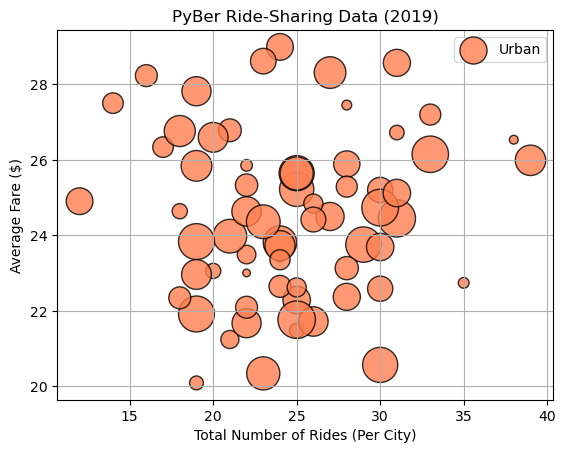

In [23]:
# Build the scatter plots for urban cities.
plt.scatter(
    urban_ride_count, 
    urban_avg_fare,
    s=10 * urban_driver_count,
    c= "coral",
    alpha=0.8,
    edgecolors= "black",
    linewidths= 1,
    label= "Urban"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

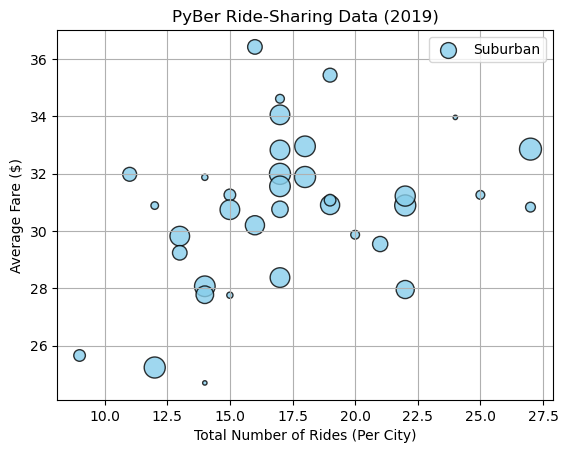

In [24]:
plt.scatter(
    suburban_ride_count,
    suburban_avg_fare,
    s=10*suburban_driver_count,
    c= "skyblue",
    alpha=0.8,
    edgecolors= "black",
    linewidths=1,
    label= "Suburban"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

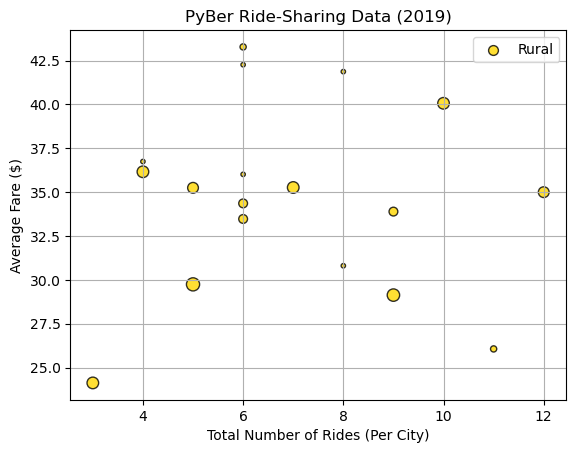

In [25]:
plt.scatter(
    rural_ride_count,
    rural_avg_fare,
    s=10*rural_driver_count,
    c= "gold",
    alpha=0.8,
    edgecolors= "black",
    linewidths=1,
    label= "Rural"
)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

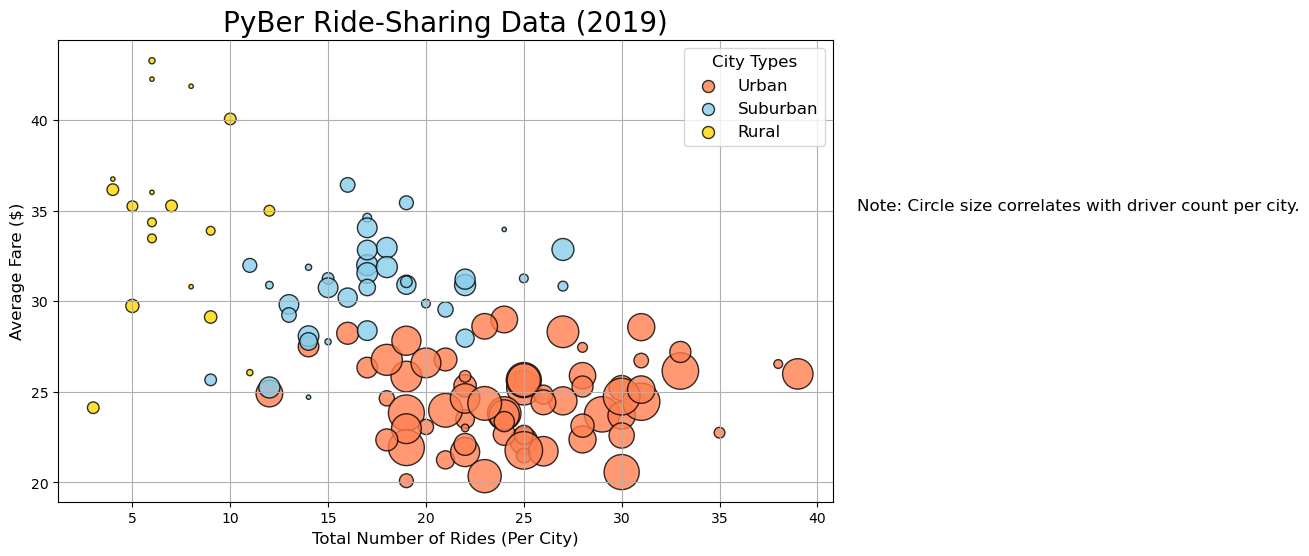

In [26]:
# Add the scatter charts for each type of city.

plt.subplots(figsize= (10, 6))

plt.scatter(
    urban_ride_count,
    urban_avg_fare,
    s=10*urban_driver_count,
    c="coral",
    alpha=0.8,
    edgecolors="black",
    linewidths=1,
    label= "Urban"
)

plt.scatter(
    suburban_ride_count,
    suburban_avg_fare,
    s=10*suburban_driver_count,
    c="skyblue",
    alpha=0.8,
    edgecolors= "black",
    linewidths=1,
    label="Suburban"
)

plt.scatter(
    rural_ride_count,
    rural_avg_fare,
    s=10*rural_driver_count,
    c="gold",
    alpha=0.8,
    edgecolors= "black",
    linewidths=1,
    label="Rural"
)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(
    fontsize= "12", mode= "Expanded",
    scatterpoints = 1, loc="best", title="City Types"
)
for i in range(3):
    lgnd.legendHandles[i]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [27]:
# Get summary statistics.

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [29]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [30]:
# Calculate the mean of the ride count for each city type.

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
# Calculate the median of the ride count for each city type.

round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [32]:
# Calculate the mode of the ride count for each city type.

urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode(), 

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

## NumPy and SciPy stats approach

In [33]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [34]:
# Calculate the measures of central tendency for the ride count for the urban cities.

mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [35]:
# Calculate the measures of central tendency for the ride count for the suburban cities.

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median for the ride counts for suburban trips is {median_suburban_ride_count}.')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.')

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [36]:
# Calculate the measures of central tendency for the ride count for the rural cities.

mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for the ride counts for rural trips is {median_rural_ride_count}.')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for rural trips is {mode_rural_ride_count}.')

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [37]:
# Get the fares for the urban cities.

urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [38]:
# Calculate the measures of central tendency for the average fare for the urban cities.

mean_urban_fares = np.mean(urban_fares)
print(f'The mean for the fares for urban trips is {mean_urban_fares}.')

median_urban_fares = np.median(urban_fares)
print(f'The median for the fares for urban trips is {median_urban_fares}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode for the fares for urban trips is {mode_urban_fares}.')

The mean for the fares for urban trips is 24.52577230769236.
The median for the fares for urban trips is 24.64.
The mode for the fares for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [39]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df['fare']

In [40]:
# Calculate the measures of central tendency for the average fare for the suburban cities.

mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean for the fares for suburban trips is {mean_suburban_fares}.')

median_suburban_fares = np.median(suburban_fares)
print(f'The median for the fares for suburban trips is {median_suburban_fares}.')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode for the fares for suburban trips is {mode_suburban_fares}.')

The mean for the fares for suburban trips is 30.97012800000002.
The median for the fares for suburban trips is 30.75.
The mode for the fares for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [41]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df['fare']

In [42]:
# Calculate the measures of central tendency for the average fare for the rural cities.

mean_rural_fares = np.mean(rural_fares)
print(f'The mean for the fares for rural trips is {mean_rural_fares}.')

median_rural_fares = np.median(rural_fares)
print(f'The median for the fares for rural trips is {median_rural_fares}.')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode for the fares for rural trips is {mode_rural_fares}.')

The mean for the fares for rural trips is 34.623440000000016.
The median for the fares for rural trips is 37.05.
The mode for the fares for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [43]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [44]:
# Calculate the measures of central tendency for the driver counts for the urban cities.

mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean for the driver count for urban cities is {mean_urban_drivers}.')

median_urban_drivers = np.median(urban_drivers)
print(f'The median for the driver count for urban cities is {median_urban_drivers}.')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode for the driver count for urban cities is {mode_urban_drivers}.')

The mean for the driver count for urban cities is 36.67815384615385.
The median for the driver count for urban cities is 37.0.
The mode for the driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [45]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [46]:
# Calculate the measures of central tendency for the driver counts for the suburban cities.

mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean for the driver count for suburban cities is {mean_suburban_drivers}.')

median_suburban_drivers = np.median(suburban_drivers)
print(f'The median for the driver count for suburban cities is {median_suburban_drivers}.')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode for the driver count for suburban cities is {mode_suburban_drivers}.')

The mean for the driver count for suburban cities is 13.712.
The median for the driver count for suburban cities is 16.0.
The mode for the driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [47]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [48]:
# Calculate the measures of central tendency for the driver counts for the rural cities.

mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean for the driver count for rural cities is {mean_rural_drivers}.')

median_rural_drivers = np.median(rural_drivers)
print(f'The median for the driver count for rural cities is {median_rural_drivers}.')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode for the driver count for rural cities is {mode_rural_drivers}.')

The mean for the driver count for rural cities is 4.296.
The median for the driver count for rural cities is 4.0.
The mode for the driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


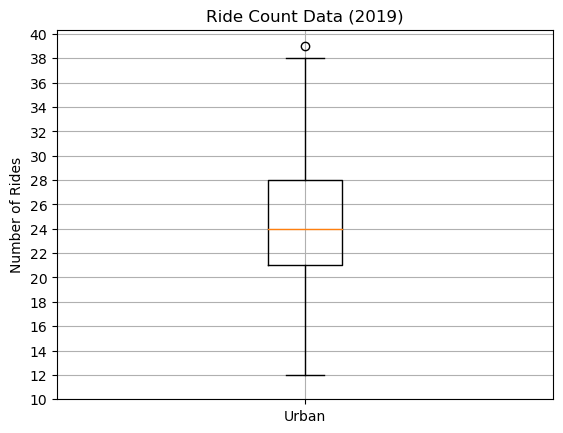

In [49]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

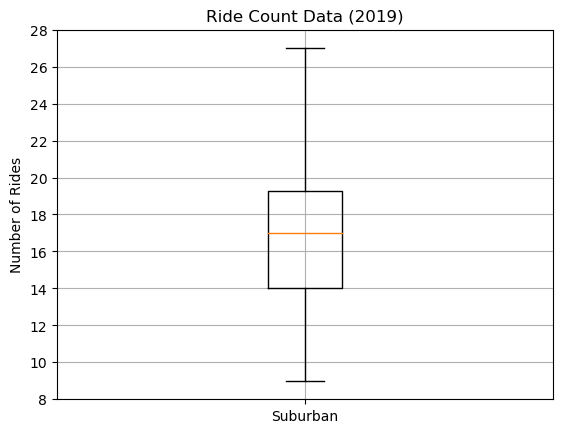

In [50]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels= x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(8, 29, step=2.0))
ax.grid(True)


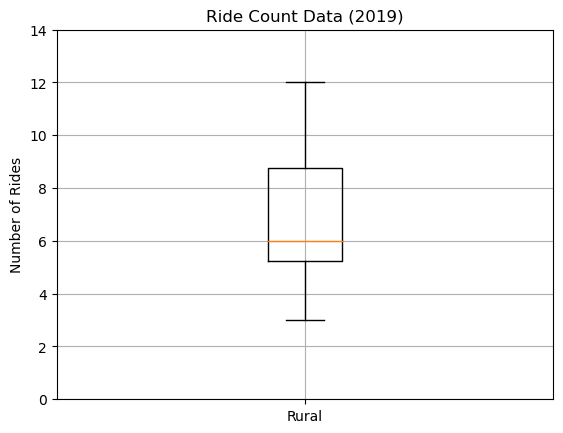

In [51]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels= x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 15, step=2.0))
ax.grid(True)

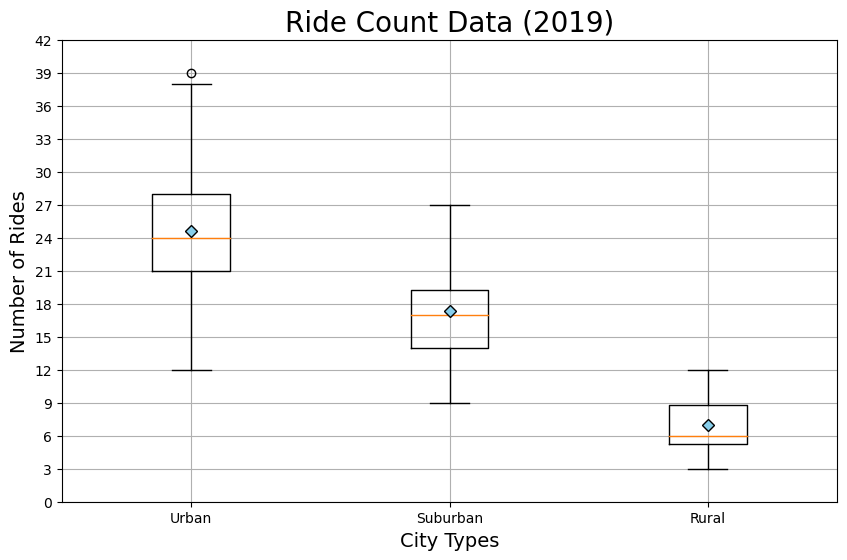

In [52]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
mean_properties = dict(
    marker='D', markerfacecolor='skyblue', markeredgecolor='black',
)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize= 14)
ax.set_xlabel("City Types", fontsize= 14)
ax.boxplot(ride_count_data, labels=x_labels, showmeans=True, meanprops=mean_properties)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid(True)

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()


In [53]:
# Get the city that matches 39.

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count, with {urban_ride_count[urban_city_outlier]} rides.")

West Angela has the highest rider count, with 39 rides.


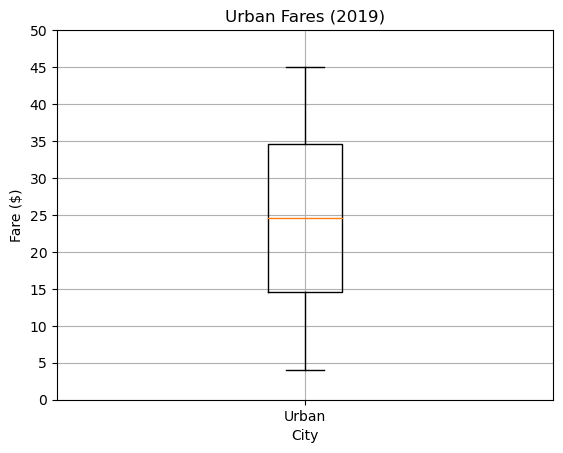

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [54]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels = x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Urban Fares (2019)")
ax.set_xlabel("City")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

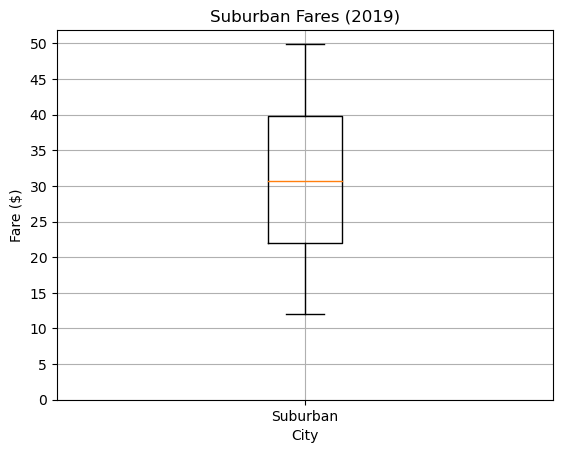

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [55]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_fares, labels = x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Suburban Fares (2019)")

ax.set_xlabel("City")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

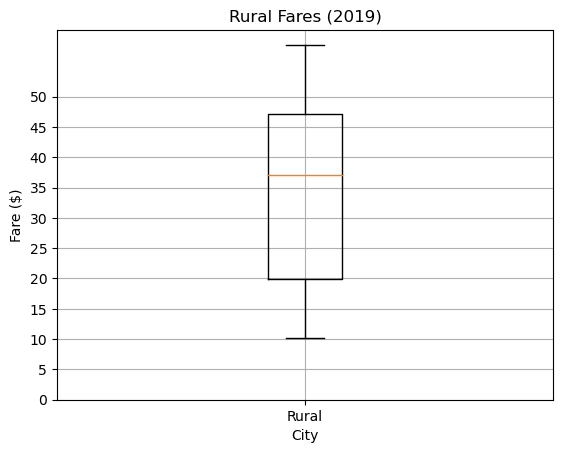

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [56]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_fares, labels = x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Rural Fares (2019)")
ax.set_xlabel("City")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

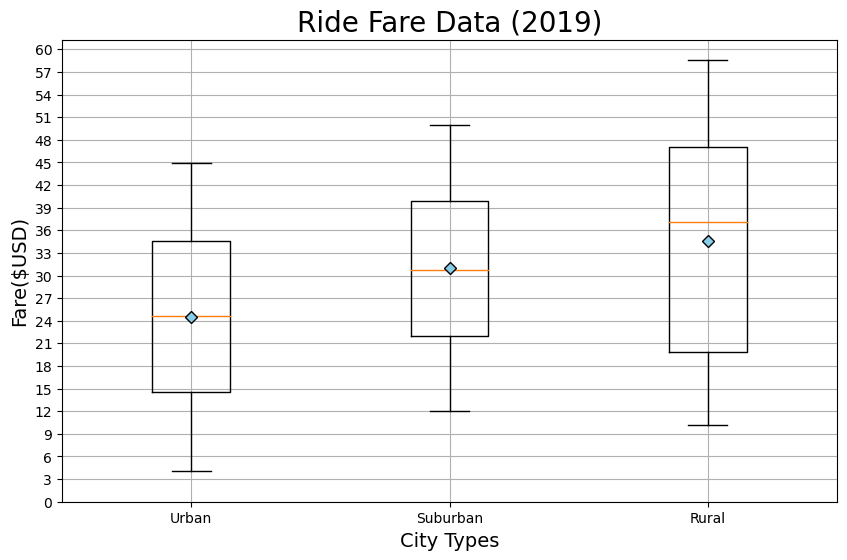

In [57]:
# Create a box-and-whisker plot for all cities fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
mean_properties = dict(marker='D', markerfacecolor='skyblue',
markeredgecolor='black'
)
ax.boxplot(fare_data, labels = x_labels, showmeans=True, meanprops= mean_properties)

# Add the title, y-axis label, grid, and save to "fig3.png"


ax.set_title("Ride Fare Data (2019)", fontsize= 20)
ax.set_xlabel("City Types", fontsize= 14)
ax.set_ylabel("Fare($USD)", fontsize= 14)
ax.set_yticks(np.arange(0, 62, step=3.0))
ax.grid()

plt.savefig(os.path.join('analysis', 'Fig3.png'))
plt.show()

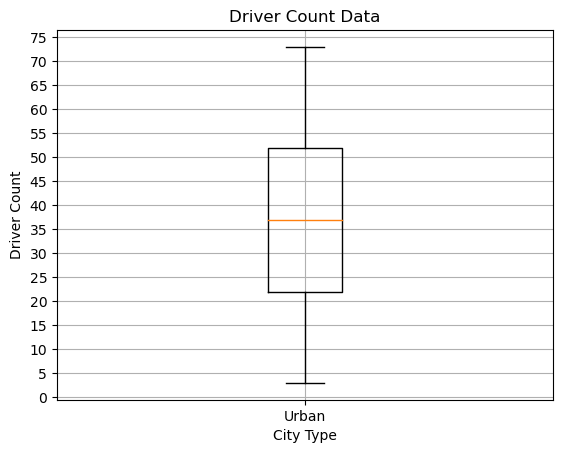

In [58]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels= x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data")
ax.set_xlabel("City Type")
ax.set_ylabel("Driver Count")
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()


plt.show()

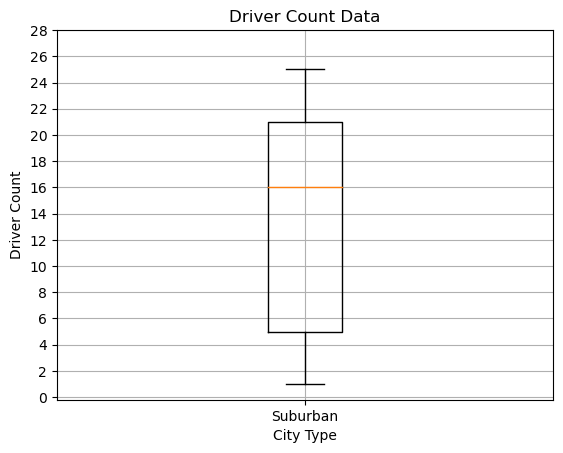

In [59]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels= x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data")
ax.set_xlabel("City Type")
ax.set_ylabel("Driver Count")
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()


plt.show()

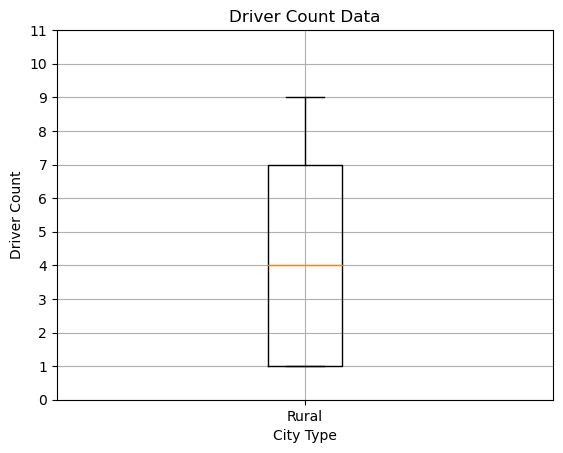

In [60]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels= x_labels)

# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data")
ax.set_xlabel("City Type")
ax.set_ylabel("Driver Count")
ax.set_yticks(np.arange(0, 12, step=1.0))
ax.grid()


plt.show()

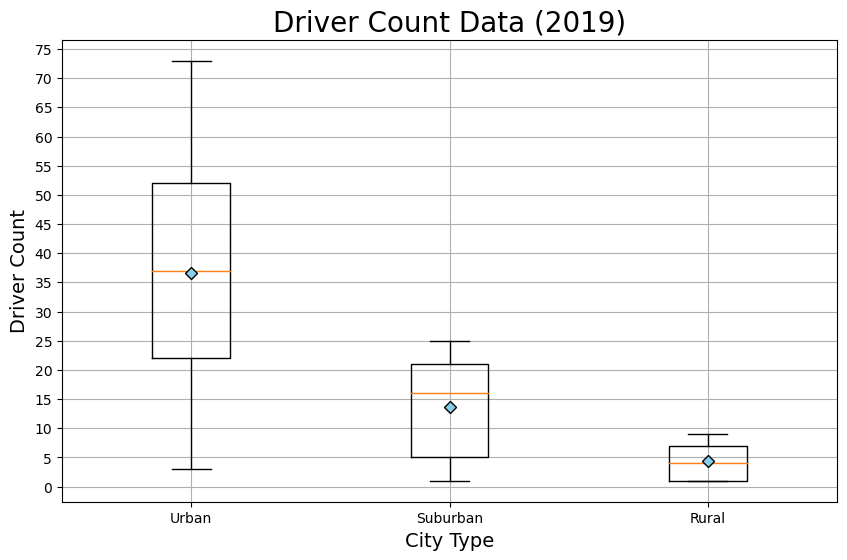

In [61]:
# Create the box-and-whisker plot for all city types' driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
mean_properties = dict(
    marker='D', markerfacecolor='skyblue', markeredgecolor='black',
)

fig, ax = plt.subplots(figsize= (10, 6))
ax.boxplot(driver_data, labels= x_labels, showmeans=True, meanprops=mean_properties)

# Add the title, y-axis label and grid.
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_xlabel("City Type", fontsize=14)
ax.set_ylabel("Driver Count", fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

plt.savefig(os.path.join('analysis', 'Fig4.png'))
plt.show()

In [62]:
sum_fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [63]:
total_fares = sum_fares_by_type.sum()
total_fares

63538.64

In [64]:
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

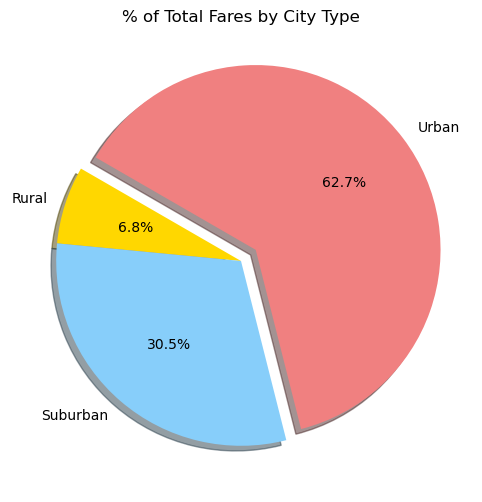

In [65]:
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
    labels=["Rural", "Suburban", "Urban"], 
    colors= ["gold", "lightskyblue", 'lightcoral'],
    explode= [0,0,0.1],
    autopct='%1.1f%%',
    shadow= True,
    startangle=150
)

plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save the chart as Fig5.png
plt.savefig(os.path.join('analysis', 'Fig5.png'))

plt.show()

In [66]:
ride_percents = 100 * pyber_data_df.groupby('type').count()['ride_id'] / pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

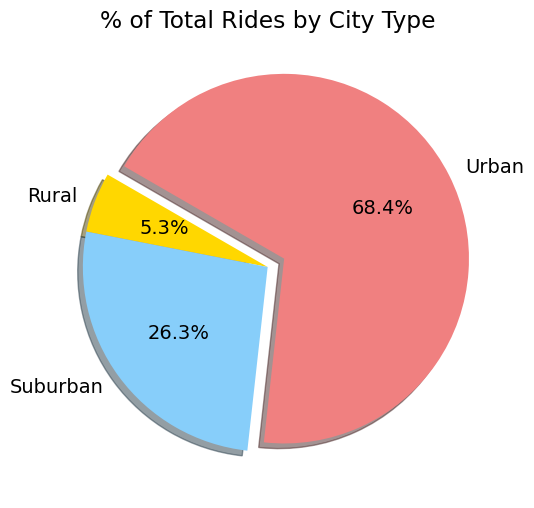

In [67]:
# Build the percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, 
    labels=["Rural", "Suburban", "Urban"], 
    colors= ["gold", "lightskyblue", 'lightcoral'],
    explode= [0,0,0.1],
    autopct='%1.1f%%',
    shadow= True,
    startangle=150
)

plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save the chart as Fig5.png
plt.savefig(os.path.join('analysis', 'Fig6.png'))

plt.show()

In [68]:
driver_percents = 100 * city_data_df.groupby('type').sum()["driver_count"] / city_data_df["driver_count"].sum()

driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

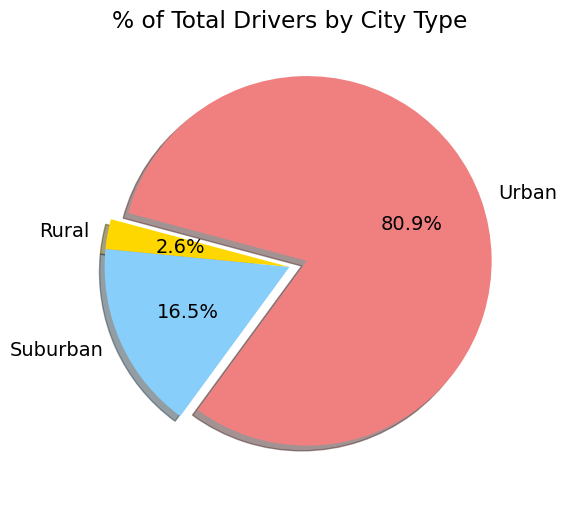

In [69]:
# Build the percentage of driver count by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents, 
    labels=["Rural", "Suburban", "Urban"], 
    colors= ["gold", "lightskyblue", 'lightcoral'],
    explode= [0,0,0.1],
    autopct='%1.1f%%',
    shadow= True,
    startangle=165
)

plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save the chart as Fig5.png
plt.savefig(os.path.join('analysis', 'Fig7.png'))

plt.show()